# Fully Connected Neural Networks 

This tutorial demonstrates the usage of fully connected neural-networks to classify 2-dimensional synthetic data. We implement the network using Keras and TensorFlow. Keras and TensorFlow are powerful frameworks that allow you to build many  deep-learning-based applications.

The goals of this tutorial are:
  - Introduce Keras and TensorFlow to implement fully connected neural network.
  - Illustrate the non-linear decision rules that multi-layer neural networks can achieve.
  
      
## Importing Python Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! ls gdrive/MyDrive/ENEL645-tutorial/ENEL645-master/

Figures     LICENSE  OUTLINE.txt  README.md
JNotebooks  Modules  PDFs	  Short-tutorials


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 
from tensorflow.keras.optimizers import SGD

import sys
## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = 'D:/code/ENEL645/Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils

## Loading and Displaying a Synthetic 2D Dataset

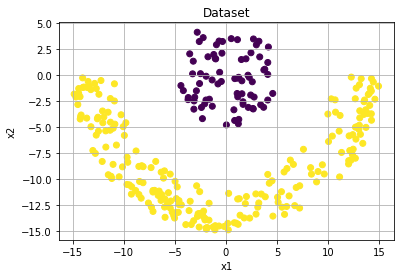

In [11]:
#Generating a synthetic dataset with four classes
nsamples = 300

#data = dataset_utils.corners(N = nsamples,scale = 0.5,gapwidth = 3,cornerwidth = 4) # linear dataset
data = dataset_utils.crescent_full_moon(N = nsamples,r1 = 5,r2 = 10,r3 = 15) #non-linear dataset

# Separating features (X) and labels (Y)
Y = data[:,-1].astype(int) # Labels
X = data[:,:-1] # Features

#Number of classes
k = np.unique(Y).size

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Dataset")
plt.show()

## Train, Validation and Test Sets Split

In [12]:
# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = np.int(0.5*Y.size)
val_split = np.int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

C:\Users\TAHSIN~1\AppData\Local\Temp/ipykernel_3820/2020166094.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_split = np.int(0.5*Y.size)
C:\Users\TAHSIN~1\AppData\Local\Temp/ipykernel_3820/2020166094.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release not

## Data Normalization

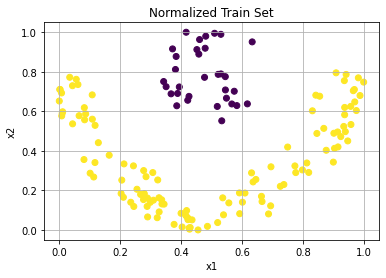

In [13]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# Change the min-max normalization above by standardization ((X - mean)/(std))
####################################################################################


#Displaying the normalized train set
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.title("Normalized Train Set")
plt.show()

## Representing Labels using one-hot-ecoding

In [14]:
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 1 1 1 1]

Y_oh_train[:5]=
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## Defining a Fully Connected Neural Network with Keras

In [15]:
def my_model(k,learning_rate = 0.15):
    inputs = Input(shape=(2,))
    l1 = Dense(10, activation='relu')(inputs)
    out1 = Dense(k, activation='softmax')(l1)
    model = Model(inputs=inputs, outputs=out1)
    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics = ["accuracy"]) 
    return model

In [17]:
model = my_model(k)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


## Training the Model

In [18]:
batch_size = train_split
nb_epoch = 300
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/300
1/1 [==============================] - 1s 508ms/step - loss: 0.8504 - accuracy: 0.3333 - val_loss: 0.7345 - val_accuracy: 0.5067
Epoch 2/300
1/1 [==============================] - 0s 24ms/step - loss: 0.7662 - accuracy: 0.3733 - val_loss: 0.6923 - val_accuracy: 0.4133
Epoch 3/300
1/1 [==============================] - 0s 23ms/step - loss: 0.7081 - accuracy: 0.4267 - val_loss: 0.6655 - val_accuracy: 0.5333
Epoch 4/300
1/1 [==============================] - 0s 28ms/step - loss: 0.6686 - accuracy: 0.5267 - val_loss: 0.6488 - val_accuracy: 0.6267
Epoch 5/300
1/1 [==============================] - 0s 30ms/step - loss: 0.6428 - accuracy: 0.6600 - val_loss: 0.6370 - val_accuracy: 0.7200
Epoch 6/300
1/1 [==============================] - 0s 31ms/step - loss: 0.6243 - accuracy: 0.7867 - val_loss: 0.6277 - val_accuracy: 0.7200
Epoch 7/300
1/1 [==============================] - 0s 31ms/step - loss: 0.6099 - accuracy: 0.7867 - val_loss: 0.6198 - val_accuracy: 0.7200
Epoch 8/300
1/1 [==

## Prininting Loss and estimated weights (Ws)

Final loss (cross-entropy and accuracy): [0.2995857894420624, 0.8933333158493042]

Layer 0
Bias:
 [ 0.05607671 -0.45378044  0.35795456  0.          0.         -0.24147859
  0.          0.          0.         -0.06396493]
W:
 [[-0.22984786 -0.03981845 -0.98692775 -0.45583385 -0.26962298  0.4407261
  -0.09548265 -0.18990427 -0.48055297 -0.57593197]
 [ 0.06242958  1.745704    0.14668462 -0.6304686  -0.10112023 -0.55805695
  -0.33393115 -0.32348868 -0.60890627  1.4362047 ]]

Layer 1
Bias:
 [-1.6456175  1.6456175]
W:
 [[-0.03890758  0.27378386]
 [ 1.4360268  -1.1966388 ]
 [-0.8006621   0.7757105 ]
 [ 0.5400228  -0.03822178]
 [ 0.33920878  0.23533821]
 [-0.12260041 -0.5552074 ]
 [-0.546973    0.063402  ]
 [ 0.51162857  0.70494324]
 [ 0.6532423   0.08097959]
 [ 0.7324815  -1.0459834 ]]



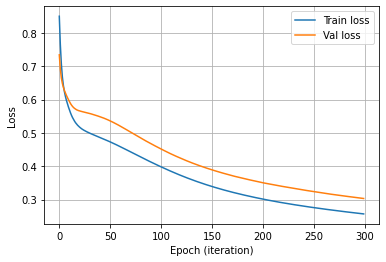

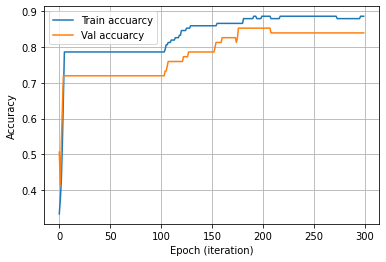

In [19]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

## Classifier Decision Boundary

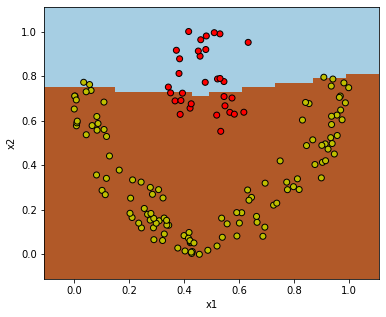

In [20]:
h = .02  # step size in the mesh
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X_train.min(axis=0) - slack, X_train.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediction of all samples in our grid
Z = model.predict(X_grid).argmax(axis = 1)
Z = Z.reshape(xx.shape)

# Display decision boundary
plt.figure(1, figsize=(6, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_train[:,0], X_train[:,1], c=colors[Y_train], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Suggested activities
- Repeat the example without normalizing the data or using standardization (i.e., subtract from the mean and divide by the standard-deviation);
- Experiment with other datasets
- Change the neural network architecture
- ...